## Task 1: Import datasets

In [1]:
# Importing pandas
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd

# Reading in the data
df = pd.read_csv("datasets/cookie_cats.csv")

# Showing the first few rows
# ... YOUR CODE FOR TASK 1 ...
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Task 2: Examine AB Test Data

In [2]:
# Counting the number of players in each AB group.
df.groupby(['version']).count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


## Task 3: Distribution of Game Rounds

Text(0, 0.5, 'User Count')

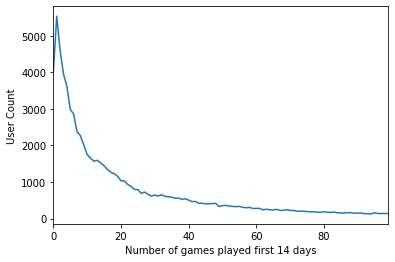

In [3]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x='sum_gamerounds', y = 'userid')
ax.set_xlabel("Number of games played first 14 days")
ax.set_ylabel("User Count")

## Task 4: 1 Day Retention Proportion

In [4]:
# The % of users that came back the day after they installed
# ... YOUR CODE FOR TASK 4 ...
df['retention_1'].mean()

0.4452095044850259

## Task 5: 1 Day Retention by Version

In [5]:
# Calculating 1-day retention for each AB-group
# ... YOUR CODE FOR TASK 5 ...
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

## Task 6: How Significant is the Difference?
#### Bootstrapping

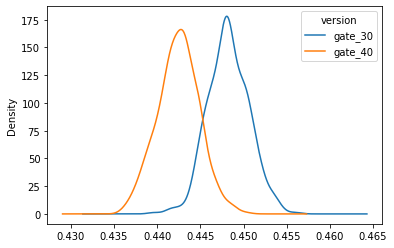

In [6]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.head()
# A Kernel Density Estimate plot of the bootstrap distributions
# ... YOUR CODE FOR TASK 6 ...
boot_1d.plot.kde()

## Task 7: Analyzing the Difference

Text(0.5, 0, 'Distribution of % Difference Gate 40 to Gate 30')

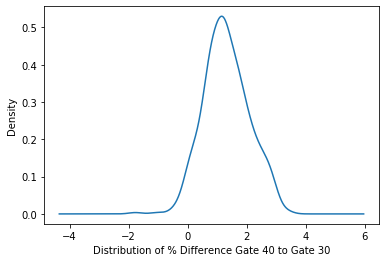

In [7]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40'])/ boot_1d['gate_40']
)*100
# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot.kde()
# ... YOUR CODE FOR TASK 7 ...
ax.set_xlabel("Distribution of % Difference Gate 40 to Gate 30")

## Task 8: Probability of a Difference

In [8]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff']>0).mean()

# Pretty printing the probability
# ... YOUR CODE FOR TASK 8 ...
print( "{0:.0%}".format(prob))

97%
